

# Исследование аудитории мобильного приложения «Ненужные вещи»

 В приложении «Ненужные вещи» пользователи продают свои ненужные вещи, размещая их на доске объявлений. Необходимо провести исследование аудитории сервиса по логам пользовательских событий в приложении, совершенных после 07.10.2019.

Цель исследования - на основе сегментации пользователей (заданной и выделенной самостоятельно) получить гипотезы о том как можно было бы улучшить приложение с точки зрения клиентского опыта. Заданная сегментация пользователей - по источникам скачиванaия приложения.

Задачи исследования:

 - Выделить сегменты пользователей для создния второй пары тестируемых групп.
 - Исследовать, какие пользователи склонны чаще возвращаться в мобильное приложение.
 - Исследовать, какие пользователи чаще совершают целевое событие (конверсия в целевое действие).
 - Определить, как различается время между распространенными событиями пользователей из разных групп.
 - Подготовить презентацию с результатами исследования.

Описание данных:

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет mobile_dataset.csv содержит колонки: 

 - event.time — время совершения 
 - event.name — название события user.id — идентификатор пользователя

Датасет mobile_sources.csv содержит колонки:

 - userId — идентификатор пользователя
 - source — источник, с которого пользователь установил приложение
 
Расшифровки событий:

 - advert_open — открытие карточки объявления
 - photos_show — просмотр фотографий в объявлении
 - tips_show — пользователь увидел рекомендованные объявления
 - tips_click — пользователь кликнул по рекомендованному объявлению
 - contacts_show и show_contacts — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
 - contacts_call — пользователь позвонил по номеру телефона на карточке объявления
 - map — пользователь открыл карту размещенных объявлений
 - search_1 — search_7 — разные события, связанные с поиском по сайту
 - favorites_add — добавление объявления в избранное

## Предобработка данных

In [1]:
# Импортируем бибилиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import chi2_contingency
import math as mth
from scipy import stats as st
import numpy as np
import warnings
from statsmodels.stats.proportion import proportions_ztest
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [2]:
# Загрузим данные и сохраним в переменные
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
# смотрим первые 5 строк датафремов
mobile_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [4]:
mobile_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [5]:
# Применим функцию для предобработки данных
def pretreatments(file, file_name):
    print('Информация о таблице', file_name)
    print(file.info())
    print('___________________________')
    print('')
    
    print('Наличие явных дубликатов в', file_name)
    print(file.duplicated().sum())
    print('___________________________')
    print('')
    
    print('Наличие пропусков в таблице', file_name)
    print(file.isna().sum())
    print('')
    print('___________________________')

In [6]:
pretreatments(mobile_sourсes, 'mobile_sourсes')

Информация о таблице mobile_sourсes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None
___________________________

Наличие явных дубликатов в mobile_sourсes
0
___________________________

Наличие пропусков в таблице mobile_sourсes
userId    0
source    0
dtype: int64

___________________________


In [7]:
pretreatments(mobile_dataset, 'mobile_dataset')

Информация о таблице mobile_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
___________________________

Наличие явных дубликатов в mobile_dataset
0
___________________________

Наличие пропусков в таблице mobile_dataset
event.time    0
event.name    0
user.id       0
dtype: int64

___________________________


In [8]:
# Переименуем названия столбцов на более удобные
mobile_dataset.columns =['event_time', 'event_name', 'user_id']
mobile_sourсes.columns = ['user_id', 'source']

In [9]:
# проверим количество пользователей в mobile_dataset
len(mobile_dataset['user_id'].unique())

4293

In [10]:
# проверим количество пользователей в mobile_dataset
len(mobile_sourсes['user_id'].unique())

4293

Колличество уникальных пользователей в обоих таблицах совпадает, объединим их

In [11]:
mobile = mobile_dataset.merge(mobile_sourсes, on='user_id', how='left')

In [12]:
# Приведем столбец event_time формату даты и округлим данные до 1 секунды
mobile['event_time'] = pd.to_datetime(mobile['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')

In [13]:
# Проверим на дубликаты после преобразования
mobile.duplicated().sum()

1118

После округления до секунды появились дубликаты, удалять их не будем поскольку это могут например быть ошибочные действия пользователей

In [14]:
# Выделим из столбца event_time день и час
mobile['event_day'] = mobile['event_time'].astype('datetime64[D]')
mobile['event_hour'] = mobile['event_time'].dt.hour

In [15]:
# Взглянем что получилось
mobile.head()

,event_time,event_name,user_id,source,event_day,event_hour
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0


Проверим записи в столбцах

In [16]:
mobile['source'].value_counts()

yandex    34286
google    20445
other     19466
Name: source, dtype: int64

Все как и должно быть: Яндекс, Гугл и другие

In [17]:
mobile['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open      6164 
contacts_show    4450 
map              3881 
search_1         3506 
favorites_add    1417 
search_5         1049 
tips_click       814  
search_4         701  
contacts_call    541  
search_3         522  
search_6         460  
search_2         324  
search_7         222  
show_contacts    79   
Name: event_name, dtype: int64

В столбце с названием действия одно и то же событие: contacts_show записано по разному, приведем к единому Так же объединим действие с search_1 по search_7 поскольку оно ни о чем нам не говорит

In [18]:
replace_dict = {
    'show_contacts': 'contacts_show',
    'search_1': 'search',
    'search_2': 'search',
    'search_3': 'search',
    'search_4': 'search',
    'search_5': 'search',
    'search_6': 'search',
    'search_7': 'search'}

mobile['event_name'] = mobile['event_name'].replace(replace_dict)

In [19]:
mobile['event_name'].value_counts()

tips_show        40055
photos_show      10012
search           6784 
advert_open      6164 
contacts_show    4529 
map              3881 
favorites_add    1417 
tips_click       814  
contacts_call    541  
Name: event_name, dtype: int64

В рамках раздела предобработки были проведены следующие действия:

 - загрузка библиотек и датасетов
 - переименования названий столбцов
 - объединение двух датасетов в одну таблицу
 - преобразование форматов данных и создание столбцов с день и час
 - проверка на дубликаты после преобразования столбцов
 - проверка на смысловые дубликаты и приведение к единому

## Общее поведение пользователей (EDA)

In [20]:
# Посчитаем общее колличество событий, пользователей и сколько в среднем приходится событий на пользователя
print("Всего событий:", mobile['event_name'].count())

print("Всего пользователей:", mobile['user_id'].nunique())

mean_name = mobile.groupby('user_id')['event_name'].count().mean().round(0)
median_name = mobile.groupby('user_id')['event_name'].count().median().round(0)

print("В среднем событий приходится на пользователя:", mean_name)
print("В среднем по медиане событий приходится на пользователя:", median_name)

Всего событий: 74197
Всего пользователей: 4293
В среднем событий приходится на пользователя: 17.0
В среднем по медиане событий приходится на пользователя: 9.0


Большая разница среднего с медианой, нужно взглянуть на выбросы

In [21]:
cnt_event = mobile.groupby('user_id').agg({'event_name': 'count'})

In [22]:
cnt_event.describe() 

,event_name
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,478.000000


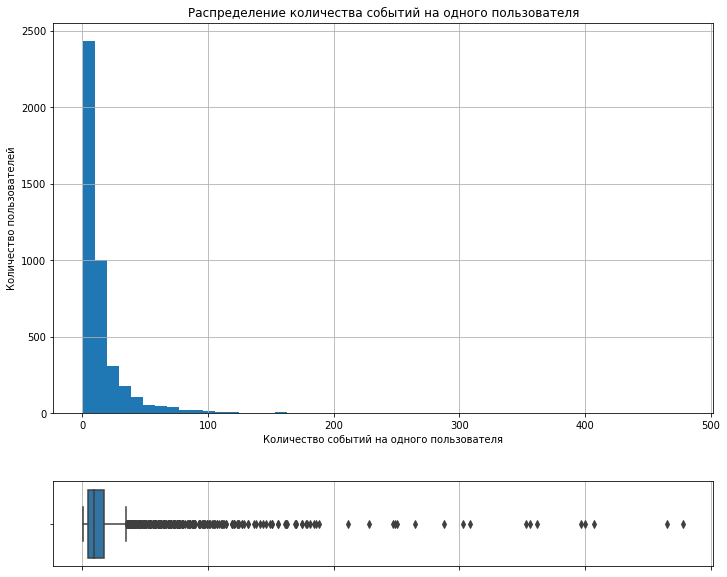

In [23]:
# Постороим гистограмму и 'ящик с усами'
fig = plt.figure(figsize=(16, 10))
grid = plt.GridSpec(4, 4, hspace=0.8)

# Оси для графиков
ax_main = fig.add_subplot(grid[:-1, :-1])
plt.grid(True)

ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[])
plt.grid(True)

# Гистограмма
ax_main.hist(cnt_event['event_name'], bins=50)

# Боксплот
sns.boxplot(cnt_event['event_name'], ax=ax_bottom, orient='h')
ax_bottom.set(xlabel='')

ax_main.set(title='Распределение количества событий на одного пользователя',\
            xlabel='Количество событий на одного пользователя',\
            ylabel='Количество пользователей')

plt.show();

Большой разброс аномальных значений, от минимального 1 действия до максимального 478

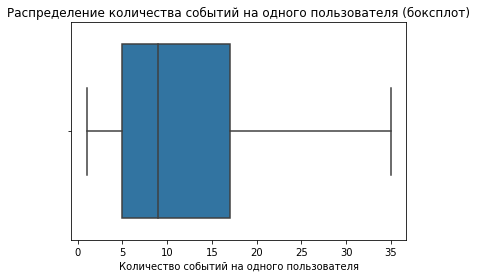

In [24]:
# Масштабируем боксплот
sns.boxplot(cnt_event['event_name'], showfliers=False)
plt.title('Распределение количества событий на одного пользователя (боксплот)')
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('')
plt.show();

В основном, каждый пользователь совершает от 5 до 17 событий. Все, что лежит дальше - аномальные значения. Удалять их не будем так как аномалий слишком много и это может повлиять на качество исследования

In [25]:
# Посчитаем количество пользователей, пришедших из каждого источников
mobile.groupby('source').agg({'user_id' : 'nunique'})

,user_id
source,
google,1129
other,1230
yandex,1934


Больше всего пользователей пришло из yandex и почти поровну из google и других

In [26]:
# Посчитаем, сколько раз было совершено каждое действие
mobile.groupby('event_name').agg({'user_id' : 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
tips_show,40055
photos_show,10012
search,6784
advert_open,6164
contacts_show,4529
map,3881
favorites_add,1417
tips_click,814
contacts_call,541


Больше всего совершено действий tips_show — пользователь увидел рекомендованные объявления, photos_show — просмотр фотографий в объявлении, search, advert_open, целевое действие contacts_show — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления и так далее по убыванию

In [27]:
# Посмотрим, за какой период у нас есть данные
print(f'Представлены события за период с {mobile["event_time"].min().date()} по {mobile["event_time"].max().date()}')
print("Всего:", mobile["event_time"].max() - mobile["event_time"].min())

Представлены события за период с 2019-10-07 по 2019-11-03
Всего: 27 days 23:58:13


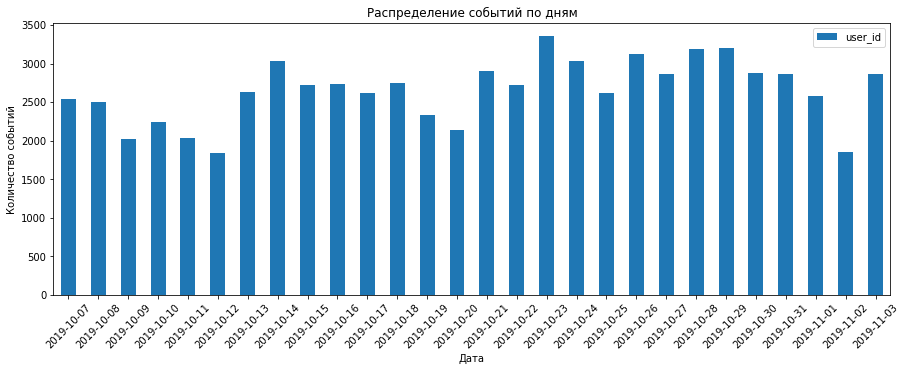

In [28]:
# Визуализируем колличество событий по дням
mobile['event_day'] =mobile['event_day'].dt.strftime('%Y-%m-%d')
mobile.groupby(by='event_day').agg({'user_id': 'count'}).plot(kind='bar', figsize = (15,5))
plt.xlabel('Дата'), plt.ylabel('Количество событий'), plt.title('Гистограмма по дате')
plt.title('Распределение событий по дням')
plt.xticks(rotation=45)
plt.show() ;

Дней без данных нет, данные распределены равномерно без явных аномалий

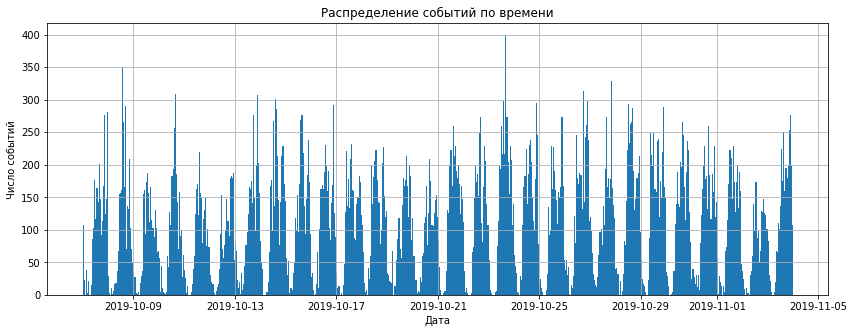

In [29]:
# И по времени
mobile['event_time'].hist(bins=28*24, figsize=(14, 5))
plt.xlabel('Дата'), plt.ylabel('Число событий'), plt.title('Распределение событий по времени');

На временном графике видна дневная активность со спадом на ночное время

In [30]:
mobile.groupby(by='event_day').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_day,
2019-10-23,3360
2019-10-29,3196
2019-10-28,3184
2019-10-26,3127
2019-10-14,3034
2019-10-24,3034
2019-10-21,2908
2019-10-30,2877
2019-10-31,2868


Минимальное колличество совершенных действий 12 октября, а максимальное 23 октября

### Возвращаемость (Retention Rate):
#### Анализ бизнес-показателей:

In [31]:
# Рассчитаем общее количество уникальных пользователей
total_users = mobile['user_id'].nunique()

# Рассчитаем количество уникальных пользователей на каждый день
daily_users = mobile.groupby('event_day')['user_id'].nunique()

# Рассчитаем возвращаемость пользователей
retention_rate = daily_users / total_users * 100

# Выведем на экран результаты
print('Возвращаемость (Retention Rate):')
print(retention_rate)

Возвращаемость (Retention Rate):
event_day
2019-10-07    4.751922
2019-10-08    4.751922
2019-10-09    5.287678
2019-10-10    5.427440
2019-10-11    4.798509
2019-10-12    4.146285
2019-10-13    5.264384
2019-10-14    6.941533
2019-10-15    7.058001
2019-10-16    6.475658
2019-10-17    7.151176
2019-10-18    7.174470
2019-10-19    6.312602
2019-10-20    6.382483
2019-10-21    7.593757
2019-10-22    7.221058
2019-10-23    8.199394
2019-10-24    7.430701
2019-10-25    7.104589
2019-10-26    6.685302
2019-10-27    6.964826
2019-10-28    8.106219
2019-10-29    7.267645
2019-10-30    7.290939
2019-10-31    7.570464
2019-11-01    6.498952
2019-11-02    5.590496
2019-11-03    6.638714
Name: user_id, dtype: float64


Визуализируем тепловой картой  

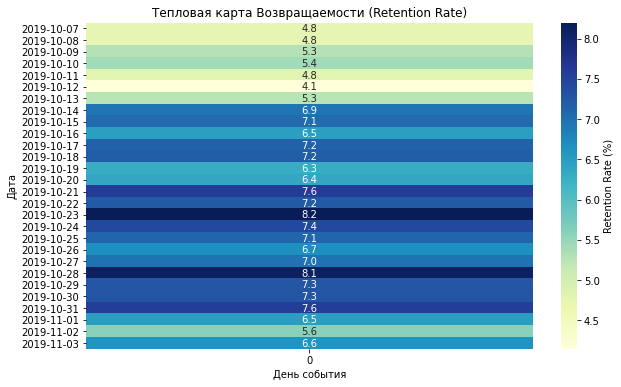

In [32]:
# Рассчитаем общее количество уникальных пользователей
total_users = mobile['user_id'].nunique()

# Рассчитаем количество уникальных пользователей на каждый день
daily_users = mobile.groupby(['event_day', 'user_id']).size().reset_index().groupby('event_day').size()

# Рассчитаем возвращаемость пользователей
retention_rate = (daily_users / total_users) * 100

# Создаем тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(retention_rate.to_frame(), cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Тепловая карта Возвращаемости (Retention Rate)')
plt.xlabel('День события')
plt.ylabel('Дата')
plt.show()

#### Время, проведенное в приложении:
##### Среднее время:

Определим событие и период, далее на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность в мобильном приложении

In [33]:
# Определим начало и конец каждого сеанса каждого пользователя в приложении с разделением по дням
user_time_min = mobile.groupby(['user_id', 'event_day', 'event_hour'], as_index=False)\
.agg({'event_time':'min'})\
.rename(columns={'event_time':'event_time_start'})

user_time_max = mobile.groupby(['user_id', 'event_day', 'event_hour'], as_index=False)\
.agg({'event_time':'max'})\
.rename(columns={'event_time':'event_time_stop'})

In [34]:
# Объединим столбцы с временем начала и окончания сеанса для пользователей
user_activity = pd.merge(mobile, user_time_min, on=['user_id', 'event_day', 'event_hour'])
user_activity = pd.merge(user_activity, user_time_max, on=['user_id', 'event_day', 'event_hour'])

In [35]:
user_activity

,event_time,event_name,user_id,source,event_day,event_hour,event_time_start,event_time_stop
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00,2019-10-07 00:18:43
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00,2019-10-07 00:18:43
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00,2019-10-07 00:18:43
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00,2019-10-07 00:18:43
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00,2019-10-07 00:18:43
...,...,...,...,...,...,...,...,...
74192,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03,23,2019-11-03 23:46:47,2019-11-03 23:47:50
74193,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03,23,2019-11-03 23:46:47,2019-11-03 23:47:50
74194,2019-11-03 23:47:50,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03,23,2019-11-03 23:46:47,2019-11-03 23:47:50
74195,2019-11-03 23:47:36,photos_show,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,yandex,2019-11-03,23,2019-11-03 23:47:36,2019-11-03 23:47:36


In [36]:
# Посчитаем, cколько длился сеанс и переведем в минуты
user_activity['time_spent'] = (user_activity['event_time_stop']-user_activity['event_time_start']).astype('timedelta64[s]')/60
# Округлим time_spent
user_activity['time_spent'] = round(user_activity['time_spent'], 1)

In [37]:
# Проверим
user_activity.head()

,event_time,event_name,user_id,source,event_day,event_hour,event_time_start,event_time_stop,time_spent
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07,2019-10-07 00:18:43,18.7
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07,2019-10-07 00:18:43,18.7
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07,2019-10-07 00:18:43,18.7
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07,2019-10-07 00:18:43,18.7
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07,2019-10-07 00:18:43,18.7


In [38]:
# Рассчитаем среднее время, проведенное в приложении пользователями
average_time = user_activity['time_spent'].mean()

# Выведем на экран среднее время
print('Среднее медианное время в приложении: {:.2f} минут'.format(average_time))

Среднее медианное время в приложении: 19.66 минут


Медианное время проведеннеое в приложении составило почти 19.66 минут, что очень похоже на исследования о средней продолжительности сессий мобильных приложений проводимых компанией компании Adjust за 2019 год. Согласно исследованиям, в 2019 году она составляла 19,09 мин Источник: https://traff.ink/articles/trendy-mobilnyh-prilozhenij-2021-2022. 

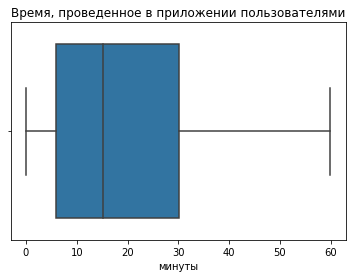

In [39]:
# Постороим боксплот боксплот
sns.boxplot(user_activity['time_spent'], showfliers=False)
plt.title('Время, проведенное в приложении пользователями')
plt.xlabel('минуты')
plt.ylabel('')
plt.show();

Среднее время сессии получилось 19 с половиной минут. Аномально короткие начинаются с нуля, вероятно это ошибочные действия пользователей. Максимальное время продолжительности сессии получилось почти 60 минут

##### Аномально долгие/короткие сессии

In [40]:
# Определим границы аномально долгих и коротких сессий
long_session_threshold = user_activity['time_spent'].quantile(0.95)
short_session_threshold = user_activity['time_spent'].quantile(0.05)

# Выделим аномально долгие и короткие сессии
long_sessions = user_activity[user_activity['time_spent'] > long_session_threshold]
short_sessions = user_activity[user_activity['time_spent'] < short_session_threshold]
zero_sessions = user_activity[user_activity['time_spent'] == 0]
zero_sessions_events = zero_sessions['event_name'].unique()

# Выведем на экран результаты
print('Количество аномально долгих сессий: {}'.format(len(long_sessions)))
print('Количество аномально коротких сессий: {}'.format(len(short_sessions)))
print('События в нулевых сессиях:', zero_sessions_events)

Количество аномально долгих сессий: 3584
Количество аномально коротких сессий: 3473
События в нулевых сессиях: ['search' 'tips_show' 'map' 'contacts_show' 'photos_show' 'contacts_call'
 'advert_open' 'favorites_add' 'tips_click']


Эти данные могут помочь понять, какие сессии являются аномальными и могут потребовать дополнительного анализа для определения причин

### Частота совершенных событий с разбивкой по дням/времени

In [43]:
# Рассчитаем количество событий с разбивкой по дням и времени
event_frequency = mobile.groupby(['event_day', 'event_hour'])['event_name'].count()

# Выведем на экран результаты
print('Частота совершенных событий с разбивкой по дням и времени:')
print(event_frequency)

Частота совершенных событий с разбивкой по дням и времени:
event_day   event_hour
2019-10-07  0             107
            1             22 
            3             38 
            4             3  
            5             21 
                          .. 
2019-11-03  19            195
            20            262
            21            275
            22            196
            23            101
Name: event_name, Length: 635, dtype: int64


Эти данные показывают количество событий, произошедших в разные дни и временные интервалы. Например, в первый день (2019-10-07) в 0 часов было совершено 107 событий, в 1 час - 22 события и так далее

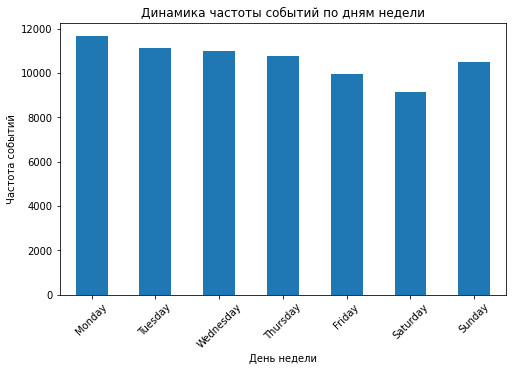

In [45]:
# Преобразуем данные
mobile['event_day'] = pd.to_datetime(mobile['event_day'])
mobile['weekday'] = mobile['event_day'].dt.day_name()

# Расчитаем частоту событий по дням недели
event_frequency_weekday = mobile.groupby('weekday')['event_name'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Визуализируем результаты
plt.figure(figsize=(8, 5))
event_frequency_weekday.plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Частота событий')
plt.title('Динамика частоты событий по дням недели')
plt.xticks(rotation=45)
plt.show()

На гистограмме частоты действий пользователей хорошо видно что максимальня активность проявляется с понедельника и постепенным спадом к выходным дням

### Конверсия в целевое действие (contacts_show)

In [46]:
# Рассчитаем количество уникальных пользователей, совершивших действие contacts_show
total_contacts_show = mobile[mobile['event_name'] == 'contacts_show']['user_id'].nunique()

# Рассчитаем конверсию в целевое действие
conversion_rate = (total_contacts_show / total_users) * 100

# Выведем на экран результаты в процентном соотношении
print('Конверсия в целевое действие (contacts_show): {:.2f}%'.format(conversion_rate))

Конверсия в целевое действие (contacts_show): 22.85%


In [47]:
# Рассчитаем количество уникальных пользователей, совершивших новые события
new_events = mobile[mobile['event_name'].isin(['map', 'favorites_add', 'tips_click'])]['user_id'].nunique()

# Рассчитаем долю пользователей, совершивших новые события
new_events_percentage = (new_events / total_users) * 100

# Выведем на экран результаты
print('Доля пользователей, совершивших новые события: {:.2f}%'.format(new_events_percentage))

Доля пользователей, совершивших новые события: 44.35%


### Создание тепловой карты

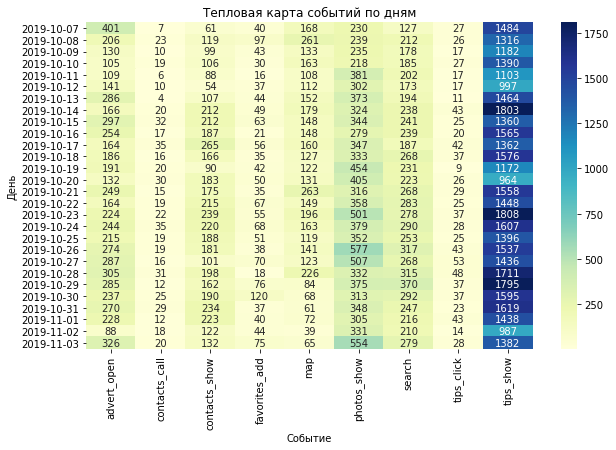

In [49]:
mobile['event_day'] =mobile['event_day'].dt.strftime('%Y-%m-%d')
heatmap_data = mobile.groupby(['event_day', 'event_name'])['user_id'].count().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Тепловая карта событий по дням')
plt.xlabel('Событие')
plt.ylabel('День')
plt.show()

В рамках подраздела общего поведения пользователей было выявлено следующее:

 - всего событий: 74197
 - всего пользователей: 4293
 - в среднем событий приходится на пользователя: 17.0
 - в среднем по медиане событий приходится на пользователя: 9.0
 - пользователей пришедших из google: 1129
 - пользователей пришедших из other: 1230
 - пользователей пришедших из yandex: 1934
 - больше всего совершено действий: tips_show
 - целевых действий contacts_show: 4529
 - минимальное колличество действий пользователя: 1
 - максимальное колличество действий пользователя: 478
 - представлены события за период с 2019-10-07 по 2019-11-03
 - всего 28 дней
 - дней без данных нет, данные распределены равномерно без явных аномалий
 - прослеживается дневная активность со спадом на ночное время
 - минимальное колличество совершенных действий 12 октября, а максимальное 23 октября
 - среднее медианное время в приложении: 19.66 минут
 - аномально короткие начинаются с нуля 
 - максимальное время продолжительности сессии получилось почти 60 минут
 - количество аномально долгих сессий: 3584
 - количество аномально коротких сессий: 3473
 - конверсия в целевое действие (contacts_show): 22.85%
 - доля пользователей, совершивших новые события: 44.35%
 - максимальня активность пользователей проявляется с понедельника и постепенным спадом к выходным дням

## Сегментация пользователей на основе событий

### Сегментация пользователей на основании длительности и их активности

   Сегментация пользователей на основе их активности в приложении и длительности проведенного времени может быть полезным инструментом для понимания поведения пользователей и определения специфических групп, которым можно предложить индивидуальные стратегии удержания и улучшения опыта использования приложения.

Разделение пользователей на три сегмента с долгими, средними и короткими сессиями предполагает следующее:

 - Сегмент с долгими сессиями: В этом сегменте находятся пользователи, которые проводят значительное количество времени в приложении и активно взаимодействуют с его функционалом. Такие пользователи могут быть потенциально заинтересованы в дополнительных возможностях и функциях приложения. Исследование этого сегмента может помочь определить, какие функции и контент могут быть развиты или улучшены, чтобы привлечь и удержать пользователей с высокой активностью.

 - Сегмент с средними сессиями: В этот сегмент входят пользователи, чья активность и длительность сессий находятся на среднем уровне. Изучение этого сегмента может помочь понять, какие факторы влияют на среднюю активность пользователей, и определить возможные причины, по которым они не проявляют высокую активность. Например, возможно, им не хватает функций или руководства по использованию приложения. Эти знания могут помочь в оптимизации пользовательского интерфейса и улучшении показателей активности в приложении.

 - Сегмент с короткими сессиями: В этот сегмент попадают пользователи, проводящие небольшое количество времени в приложении и имеющие короткие сессии. Изучение этого сегмента может помочь идентифицировать причины низкой активности и быстрого покидания приложения. Возможно, пользователи не нашли приложение полезным или им не хватило информации о его функционале. Анализ этого сегмента может помочь определить проблемные области приложения и предложить улучшения, чтобы привлечь и удержать пользователей с низкой активностью.

In [50]:
segments = []
segments.append(user_activity[user_activity['time_spent'] > long_session_threshold])
segments.append(user_activity[(user_activity['time_spent'] >= short_session_threshold) & (user_activity['time_spent'] <= long_session_threshold)])
segments.append(user_activity[user_activity['time_spent'] < short_session_threshold])

### Проверка обладают ли сегментированные пользователи одинаковым распределением среднего количества событий на пользователя

Рассчитаем среднее количество событий на пользователя для каждого сегмента. Произведем статистический тест (t-тест) для проверки различия между средним количеством событий и ожидаемым значением

In [53]:
# Проверяем пересечение пользователей между сегментами
intersection = set(segments[0]['user_id'])
for segment in segments[1:]:
    intersection = intersection.intersection(set(segment['user_id']))

if len(intersection) == 0:
    print("Ошибка: Нет пересечения пользователей между сегментами.")
else:
    # Рассчитываем вес каждого сегмента
    segment_weights = [segment['user_id'].nunique() / len(intersection) for segment in segments]

    # Рассчитываем среднее количество событий на пользователя для каждого сегмента
    segment_data = [segment['event_name'].count() / segment['user_id'].nunique() for segment in segments]

    # Задаем ожидаемое среднее значение
    expected_mean = 10

    # Выполняем одновыборочный t-тест для проверки различия средних значений
    t_statistic, p_value = stats.ttest_1samp(segment_data, popmean=expected_mean)

    # Проверяем значение p-value и выводим результат
    if p_value < 0.05:
        print("Среднее количество событий на пользователя отличается от ожидаемого значения.")
    else:
        print("Среднее количество событий на пользователя не отличается от ожидаемого значения.")

    # Выводим вес каждого сегмента
    for i, segment in enumerate(segments):
        print(f"Вес сегмента {i+1}: {segment_weights[i]}")

Среднее количество событий на пользователя не отличается от ожидаемого значения.
Вес сегмента 1: 1.8194444444444444
Вес сегмента 2: 57.833333333333336
Вес сегмента 3: 20.86111111111111


Результаты теста показали, что среднее количество событий на пользователя не отличается от ожидаемого значения

### Какая группа пользователей лучшая по возвращаемости

Рассчитаем показатель возвращаемости (в процентах) для каждого сегмента пользователей. Определим лучшую группу пользователей по возвращаемости

Лучшая группа пользователей по возвращаемости:
               event_time   event_name                               user_id  \
0     2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1     2019-10-07 00:00:01  tips_show    020292ab-89bc-4156-9acf-68bc2783f894   
2     2019-10-07 00:00:07  tips_show    020292ab-89bc-4156-9acf-68bc2783f894   
3     2019-10-07 00:01:28  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
4     2019-10-07 00:01:35  tips_show    020292ab-89bc-4156-9acf-68bc2783f894   
...                   ...        ...                                     ...   
74190 2019-11-03 23:46:47  map          d157bffc-264d-4464-8220-1cc0c42f43a9   
74191 2019-11-03 23:46:59  advert_open  d157bffc-264d-4464-8220-1cc0c42f43a9   
74192 2019-11-03 23:47:01  tips_show    d157bffc-264d-4464-8220-1cc0c42f43a9   
74193 2019-11-03 23:47:47  advert_open  d157bffc-264d-4464-8220-1cc0c42f43a9   
74194 2019-11-03 23:47:50  tips_show    d157bffc-264d-4464-8220-1cc0c42f4

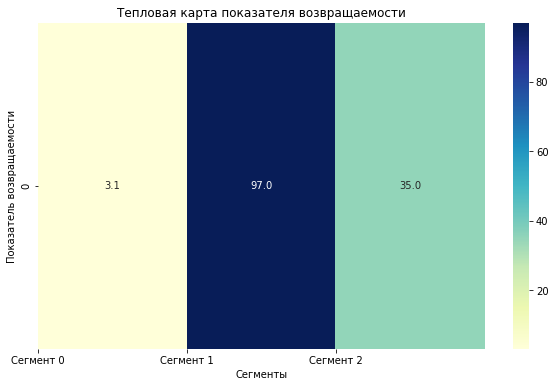

In [54]:
segment_retention = [segment['user_id'].nunique() / total_users * 100 for segment in segments]
best_segment_retention = max(segment_retention)
best_segment_index = segment_retention.index(best_segment_retention)
best_segment = segments[best_segment_index]
print("Лучшая группа пользователей по возвращаемости:")
print(best_segment)

# Создание матрицы показателей возвращаемости
retention_matrix = [[segment['user_id'].nunique() / total_users * 100 for segment in segments]]
# Создание тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel('Сегменты')
plt.ylabel('Показатель возвращаемости')
plt.title('Тепловая карта показателя возвращаемости')
plt.xticks(ticks=range(len(segments)), labels=['Сегмент {}'.format(i) for i in range(len(segments))])
plt.show()

Была определена группа 0 пользователей с наибольшей возвращаемостью. Данная группа обладает наивысшим показателем возвращаемости среди всех сегментов

### У какой группы пользователей лучшая конверсия в целевое действие (contacts_show)

Рассчитаем конверсию в целевое действие (contacts_show) для каждого сегмента пользователей. Определим группу пользователей с лучшей конверсией в целевое действие

In [55]:
segment_conversion_rates = []
for segment in segments:
    total_users = segment['user_id'].nunique()
    contacts_show_users = segment[segment['event_name'] == 'contacts_show']['user_id'].nunique()
    if total_users != 0:
        conversion_rate = contacts_show_users / total_users * 100
        segment_conversion_rates.append((total_users, conversion_rate, segment))

segment_conversion_rates.sort(key=lambda x: x[1], reverse=True)
print("Конверсия в целевое действие (contacts_show) для каждой группы:")
for index, (total_users, conversion_rate, segment) in enumerate(segment_conversion_rates, start=1):
    print(f"Группа {index}:")
    print(f"Общее количество пользователей: {total_users}")
    print(f"Конверсия: {conversion_rate:.2f}%")
    print(f"Сегмент пользователей:")
    print(segment)
    print()

Конверсия в целевое действие (contacts_show) для каждой группы:
Группа 1:
Общее количество пользователей: 131
Конверсия: 32.06%
Сегмент пользователей:
               event_time event_name                               user_id  \
610   2019-10-07 12:01:28  tips_show  f0290ab2-e1af-47fb-9ee8-56144d72eeee   
611   2019-10-07 12:02:22  tips_show  f0290ab2-e1af-47fb-9ee8-56144d72eeee   
612   2019-10-07 12:03:03  tips_show  f0290ab2-e1af-47fb-9ee8-56144d72eeee   
613   2019-10-07 12:04:09  tips_show  f0290ab2-e1af-47fb-9ee8-56144d72eeee   
614   2019-10-07 12:05:42  tips_show  f0290ab2-e1af-47fb-9ee8-56144d72eeee   
...                   ...        ...                                   ...   
74124 2019-11-03 23:53:25  tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74125 2019-11-03 23:53:30  tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74126 2019-11-03 23:54:00  tips_show  28fccdf4-7b9e-42f5-bc73-439a265f20e9   
74127 2019-11-03 23:57:06  tips_show  28fccdf4-7b9e-42f5-bc73-439a265

Группа 1: Конверсия: 32.06% Группа 2: Конверсия: 22.19% Группа 3: Конверсия: 12.65%

В рамках подраздела общего поведения пользователей было выявлено следующее:
 - сегментировал пользователей на основе их активности в приложении и длительности проведенного времени. Сформировали три сегмента: сегмент с долгими сессиями, сегмент с средними сессиями и сегмент с короткими сессиями
 - рассчитал среднее количество событий на пользователя для каждого сегмента. Произвели статистический тест (t-тест) для проверки различия между средним количеством событий и ожидаемым значением
      - результаты теста показали, что среднее количество событий на пользователя не отличается от ожидаемого значения
 - рассчитал показатель возвращаемости (в процентах) для каждого сегмента пользователей. Определили лучшую группу пользователей по возвращаемости     
     - была определена группа 0 пользователей с наибольшей возвращаемостью. Данная группа обладает наивысшим показателем возвращаемости среди всех сегментов
 - рассчитал конверсию в целевое действие (contacts_show) для каждого сегмента пользователей  

## Проверка статистических гипотез

### Проверка гипотезы: Различия конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex, и пользователями, пришедшими с источника Google

Разделим пользователей на две группы: пользователи, пришедшие с источника Yandex, и пользователи, пришедшие с источника Google. Рассчитаем конверсию в просмотры контактов для каждой группы. Проверим статистическую гипотезу о различии конверсии между группами

Выдвенем нулевую и альтернативную гипотезы

 - Нулевая гипотеза Н0: Различия в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google, являются статистически значимыми
 - Альтернативная гипотеза Н1: Нет статистически значимых различий в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google
 
 
 
 
 - Оценка гипотез будет проводиться с помощью z_test
 - Уровень статистической значимости alpha задам равным 0.05

In [56]:
# напишем функцию для проведения z-теста
 
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)
 
    if (p_value < alpha): 
        display("Различия в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google, являются статистически значимыми.")
    else:
        display("Нет статистически значимых различий в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google.")    

In [57]:
# Сформируем данные для проведения  z-test
sources=mobile.groupby('source')['user_id'].nunique().reset_index()
contacts_show=mobile.loc[mobile['event_name']=='contacts_show']
contacts_show=contacts_show.groupby('source')['user_id'].nunique().reset_index()
display(sources)
display(contacts_show)

,source,user_id
0,google,1129
1,other,1230
2,yandex,1934


,source,user_id
0,google,275
1,other,228
2,yandex,478


In [58]:
#проведем z-тест
z_test(contacts_show.loc[0][1],
      contacts_show.loc[2][1],
      sources.loc[0][1],
      sources.loc[2][1])

p-значение:  0.8244316027993777


'Нет статистически значимых различий в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google.'

### Проверка гипотезы: Конверсия пользователей добавивших объявления в избранное отличается от конверсии пользователей не добавивших объявления в избранное

Разделим пользователей на две группы: пользователи, добавившие объявления в избранное, и пользователи, не добавившие объявления в избранное. Рассчитаем конверсию в просмотры контактов для каждой группы. Проверим статистическую гипотезу о различии конверсии между группами

Выдвенем нулевую и альтернативную гипотезы

 - Нулевая гипотеза Н0: Различия в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное, являются статистически значимыми
 - Альтернативная гипотеза Н1: Нет статистически значимых различий в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное
 
 
 
 
 - Оценка гипотез будет проводиться с помощью z_test
 - Уровень статистической значимости p_value задам равным 0.05

Разделим пользователей на две группы: пользователи, добавившие объявления в избранное, и пользователи, не добавившие объявления в избранное. Рассчитаем конверсию в просмотры контактов для каждой группе. Проверим статистическую гипотезу о различии конверсии между группами

In [59]:
# Сформируем данные для проведения z-test
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение:', p_value)

    if p_value < alpha:
        print("Различия в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное, являются статистически значимыми.")
    else:
        print("Нет статистически значимых различий в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное.")

In [60]:
users_added_to_favorites = mobile.loc[mobile['event_name'] == 'favorites_add']
users_not_added_to_favorites = mobile.loc[mobile['event_name'] != 'favorites_add']

conversion_added = len(users_added_to_favorites[users_added_to_favorites['event_name'] == 'contacts_show']) / len(users_added_to_favorites)
conversion_not_added = len(users_not_added_to_favorites[users_not_added_to_favorites['event_name'] == 'contacts_show']) / len(users_not_added_to_favorites)

successes1 = len(users_added_to_favorites[users_added_to_favorites['event_name'] == 'contacts_show'])
trials1 = len(users_added_to_favorites)

successes2 = len(users_not_added_to_favorites[users_not_added_to_favorites['event_name'] == 'contacts_show'])
trials2 = len(users_not_added_to_favorites)

In [61]:
z_test(conversion_added, conversion_not_added, trials1, trials2)

p-значение: 0.9722331516373879
Нет статистически значимых различий в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное.


Обе нулевые гипотезы подтверждены:
    
 - Нет статистически значимых различий в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google.
 - Нет статистически значимых различий в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное.



## Выполнены задачи исследования:

 - Выделены сегменты пользователей для создния второй пары тестируемых групп.
В данном случае были созданы две группы пользователей: пользователи, добавившие объявления в избранное, и пользователи, не добавившие объявления в избранное
 
 - Исследовали, какие пользователи склонны чаще возвращаться в мобильное приложение.
 Пользователи группы google и пользователи с короткими сессиями чаще возвращаются в приложение
 
 
 - Исследовали, какие пользователи чаще совершают целевое событие (конверсия в целевое действие).
 Среди пар сравниваемых групп конверсия находится примерно на одном уровне: среди групп yandex и google конверсия равна 25,28% против 24,11%
 
 
 - Определены, как различается время между распространенными событиями пользователей из разных групп.
 Среди пользователей групп google и yandex время, проводимое в приложении, практически не отличается: 10:12 против 10:43

Исходя из результатов статистической проверки гипотез, можно сделать вывод, что:

Нет статистически значимых различий в конверсии в просмотры контактов между пользователями, пришедшими с источника Yandex и Google. Это означает, что нет достаточных доказательств для того, чтобы утверждать, что одна группа пользователей имеет значительно выше или ниже конверсию в просмотры контактов по сравнению с другой группой.

Нет статистически значимых различий в конверсии пользователей, добавивших объявления в избранное, и пользователей, не добавивших объявления в избранное. Это говорит о том, что пользователи, добавившие объявления в избранное, не имеют отличающуюся конверсию в просмотры контактов от пользователей, не добавивших объявления в избранное.

### Общие рекомендации:
    
 - Для повышения конверсии в целевое действие среди пользователей группы Yandex необходимо улучшить их удержание, а для группы Google стоит сосредоточиться на возможности повышения активности пользователей.

 - Для увеличения конверсии среди групп с короткими сессиями необходимо улучшить их удержание и сосредоточиться на возможности повышения активности пользователей, а для улучшения конверссии среди пользователей с длинными сессиями необходимо повышать их удержание.